## Prueba 2: Machine Learning 

Alumnos G56:

* Francisca Galvez
* Daniel Herrera.

## Hito 1

**Descripción del problema.**

El objetivo de este estudio es desarrollar un modelo predictivo de **clasificación** que permita determinar si el procedimiento policial terminará en arresto o si este mismo ocurrirá con un acto de violencia. Para esto utilizaremos como datos de entrenamiento los datos públicos de la policía de Nueva York del año 2009 y como conjunto de validación utilizaremos los datos del año 2010.

**Métricas de desempeño**

Como este es un problema de **clasificación**, nos centraremos en la predicción de la clasificación para una nueva observación. Para lo cual se utilizarán las siguientes métricas:

* **Accuracy (exactitud)**: Para confirmar el porcentaje de casos predichos correctamente por sobre el total de casos.
* **Precision**: Para medir la fracción de predicciones correctas entre las etiquetas positivas.
* **Recall**: Para medir la fracción de verdaderos positivos predichos por el modelo.
* **F1**: Para representar la media armónica entre Precision y Recall (es decir, una medida general de la presición).

**Modelos a Utilizar**

Se usarán modelos de clasificación, los cuales son:

* **Regresión Logística**: Modelo que se utiliza para predecir la probabilidad de una variable binaria (0 o 1), utilizando una función logarítmica para describir la relación entre la variable dependiente e independiente.
* **Máquina de Soporte Vectorial**: Modelo que utiliza una separación lineal o no lineal para clasificar los datos, mediante la identificación de los puntos más cercanos a la frontera de decisión.
* **Random Forest**: Modelo que combina varias decisiones basadas en árboles para mejorar la precisión y reducir el riesgo de sobreajuste.
* **GradientBoostingClassifier**: Modelo de emsamble que está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores.
* **VotingClassifier**: Con este modelo podemos entrenar varios modelos con los mismos datos a la vez. Cada modelo tendrá asociado un voto y la predicción final se decidirá dependiendo de los votos de la mayoría.

**Grilla tentativa**

* Grilla para modelos de predicción del arresto:
    * LogisticRegression:
        penalty: [l1, l2, elasticnet, None]
        C: [0.01, 1, 100]
        class_weight: [balanced, None]
    * DecisionTreeClassifier:
        criterion: ['gini','entropy','log_loss']
        max_features: [None,'log2','sqrt']
        max_depth: range(1, 20, 4)
        class_weight: ['balanced', None]
    * RandomForestClassifier:
        max_features: [None, 'log2', 'sqrt']
        n_estimators: range(10, 100, 10)
        class_weight: ['balanced', None] 

* Grilla para modelos que predecirá si habrá alguna acción violenta:
    * LogisticRegression:
        'penalty': ['l2', None],
        'C': [0.01, 1, 10, 100],
        'class_weight': ['balanced', None],
    * RandomForestClassifier:
        'max_features': [None, 'log2', 'sqrt'],
        'n_estimators': range(10, 100, 10),
        'class_weight': ['balanced', None]
    * GradientBoostingClassifier:
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [50, 200, 500],
        'subsample': [0.1, 0.5, 0.9]
    * SVC:
        'C': [0.001, 0.1, 1, 100],
        'gamma': [0.0001, 0.01, 1, 10],
        'class_weight': ['balanced', None]
    * VotingClassifier:
        estimators: los mejores 4 modelos anteriores según sus métricas.

#### Aspectos computacionales

**Librerías a utilizar**

* **pandas**: Esta biblioteca se utiliza para el análisis de datos y la manipulación de tablas, proporcionando estructuras de datos útiles para el análisis de datos.
* **numpy**: Esta biblioteca se utiliza para el cálculo numérico y las operaciones matemáticas en Python.
* **matplotlib**: Esta biblioteca permite crear gráficos y visualizaciones en Python.
* **seaborn**: Esta biblioteca se utiliza para crear gráficos y visualizaciones más avanzados que los disponibles en matplotlib.
* **missingno**: Esta biblioteca permite una visualización rápida de los datos que faltan en un conjunto de datos.
* **sklearn**: Es una biblioteca de aprendizaje automático de Python que proporciona una variedad de herramientas para la construcción de modelos.
* **pickle**: Esta biblioteca se utiliza para serializar y guardar objetos Python en un archivo, lo que permite reutilizarlos posteriormente.
* **warnings**: Esta librería se utiliza para controlar las advertencias que se muestran durante la ejecución del código.

**Proceso de preprocesamiento y recodificación de datos**  

El proceso de preprocesamiento y recodificación de los datos consistirá en lo siguiente:

* **missingno**: Se realizará una observación de ambas bases de datos para revisar si existen datos faltantes o nulos.
* **dummies**: Se recodificará las variables que sean necesarias para ingresar de mejor manera los datos en los modelos a trabajar.
* **oversampling**: Se balanceará la muestra para buscar mejores resultados en el fit y predicción de los modelos.

## Análisis Exploratorio de Datos

### Importamos librerías

In [172]:
# Importamos librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgo

# Importamos warnings para que nuestra visualización sea más cómoda
import warnings
warnings.filterwarnings('ignore')

# Importamos librerías para preprocesamientos y modelación de datos
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report

# Importamos librería para la persistencia del modelo  
import pickle

# Importamos librería para balancear la muestra
from imblearn.over_sampling import RandomOverSampler

# Helpers
sns.set_style("darkgrid")

### Importamos base de datos y eliminamos la columna "Unnamed: 0"

In [2]:
# Importamos la base de entrenamiento y validación
df_2009 = pd.read_csv('2009_1perc.csv').drop('Unnamed: 0', axis=1)
df_2010 = pd.read_csv('2010_1perc.csv').drop('Unnamed: 0', axis=1)
 
# Observamos información sobre datos de entrenamiento
df_2009.describe()

,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,addrpct,linecm,detailcm
count,5812.0,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5812.000000,5812.0,5812.0,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5812.000000,5812.000000,5812.000000,5812.0,5812.000000
mean,2009.0,69.051617,5769.119924,6.255350e+06,1426.219202,2.665893,5.501893,0.0,0.0,252.115795,249.074845,6.941142e+06,28.874054,5.188231,6.414315,169.942533,69.051617,1.0,37.488644
std,0.0,32.846903,5524.955522,3.447243e+06,736.239726,4.816704,5.922592,0.0,0.0,305.058678,306.222306,3.552806e+06,26.067172,0.402213,3.446479,37.653637,32.846903,0.0,25.059538
min,2009.0,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000,1.000000,1.0,6.000000
25%,2009.0,42.000000,1902.750000,3.172009e+06,1030.000000,1.000000,3.000000,0.0,0.0,70.000000,67.000000,4.061986e+06,19.000000,5.000000,4.000000,150.000000,42.000000,1.0,20.000000
50%,2009.0,73.000000,4347.000000,6.142009e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.121980e+06,25.000000,5.000000,7.000000,170.000000,73.000000,1.0,28.000000
75%,2009.0,102.000000,7616.750000,9.192009e+06,2035.000000,3.000000,5.000000,0.0,0.0,178.000000,178.750000,1.012198e+07,34.000000,5.000000,9.000000,180.000000,102.000000,1.0,46.000000
max,2009.0,123.000000,31694.000000,1.231201e+07,2830.000000,200.000000,200.000000,0.0,0.0,879.000000,879.000000,1.231199e+07,999.000000,7.000000,11.000000,999.000000,123.000000,1.0,113.000000


In [3]:
# Observamos información sobre target
df_2009['arstmade'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5812 entries, 0 to 5811
Series name: arstmade
Non-Null Count  Dtype 
--------------  ----- 
5812 non-null   object
dtypes: object(1)
memory usage: 45.5+ KB


### Limpieza de datos

<AxesSubplot:>

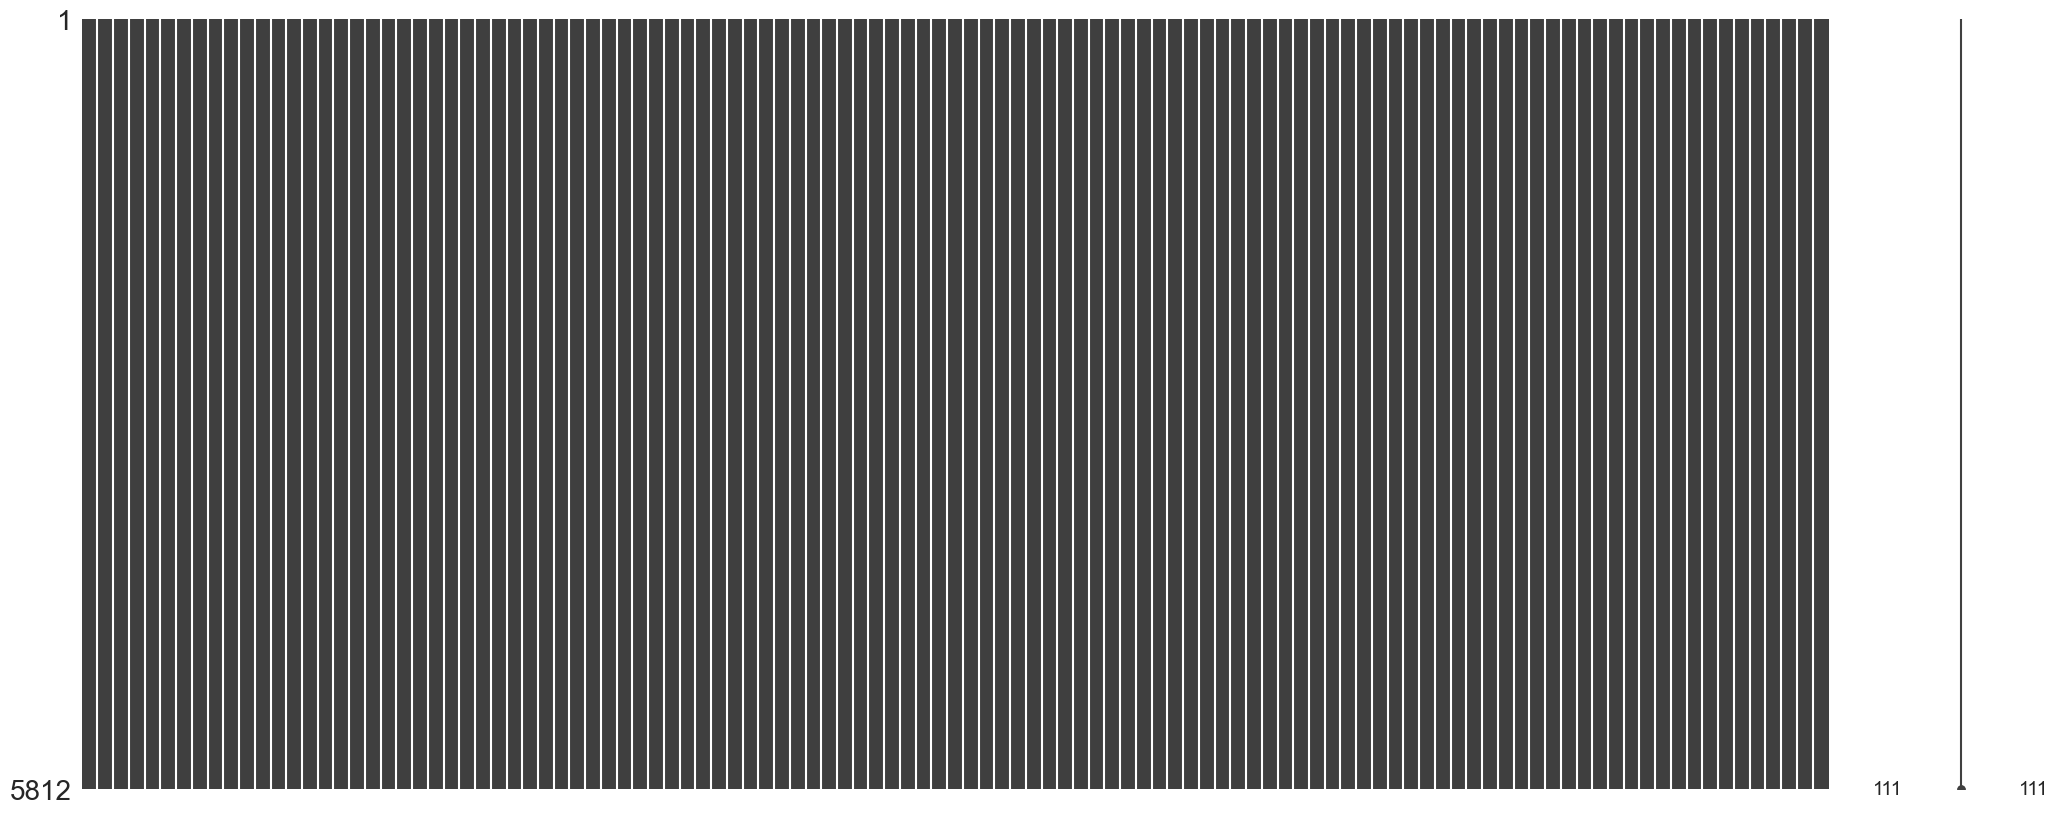

In [4]:
# Observaremos datos faltantes o nulos en la base de datos de entrenamiento (2009)
msgo.matrix(df_2009)

<AxesSubplot:>

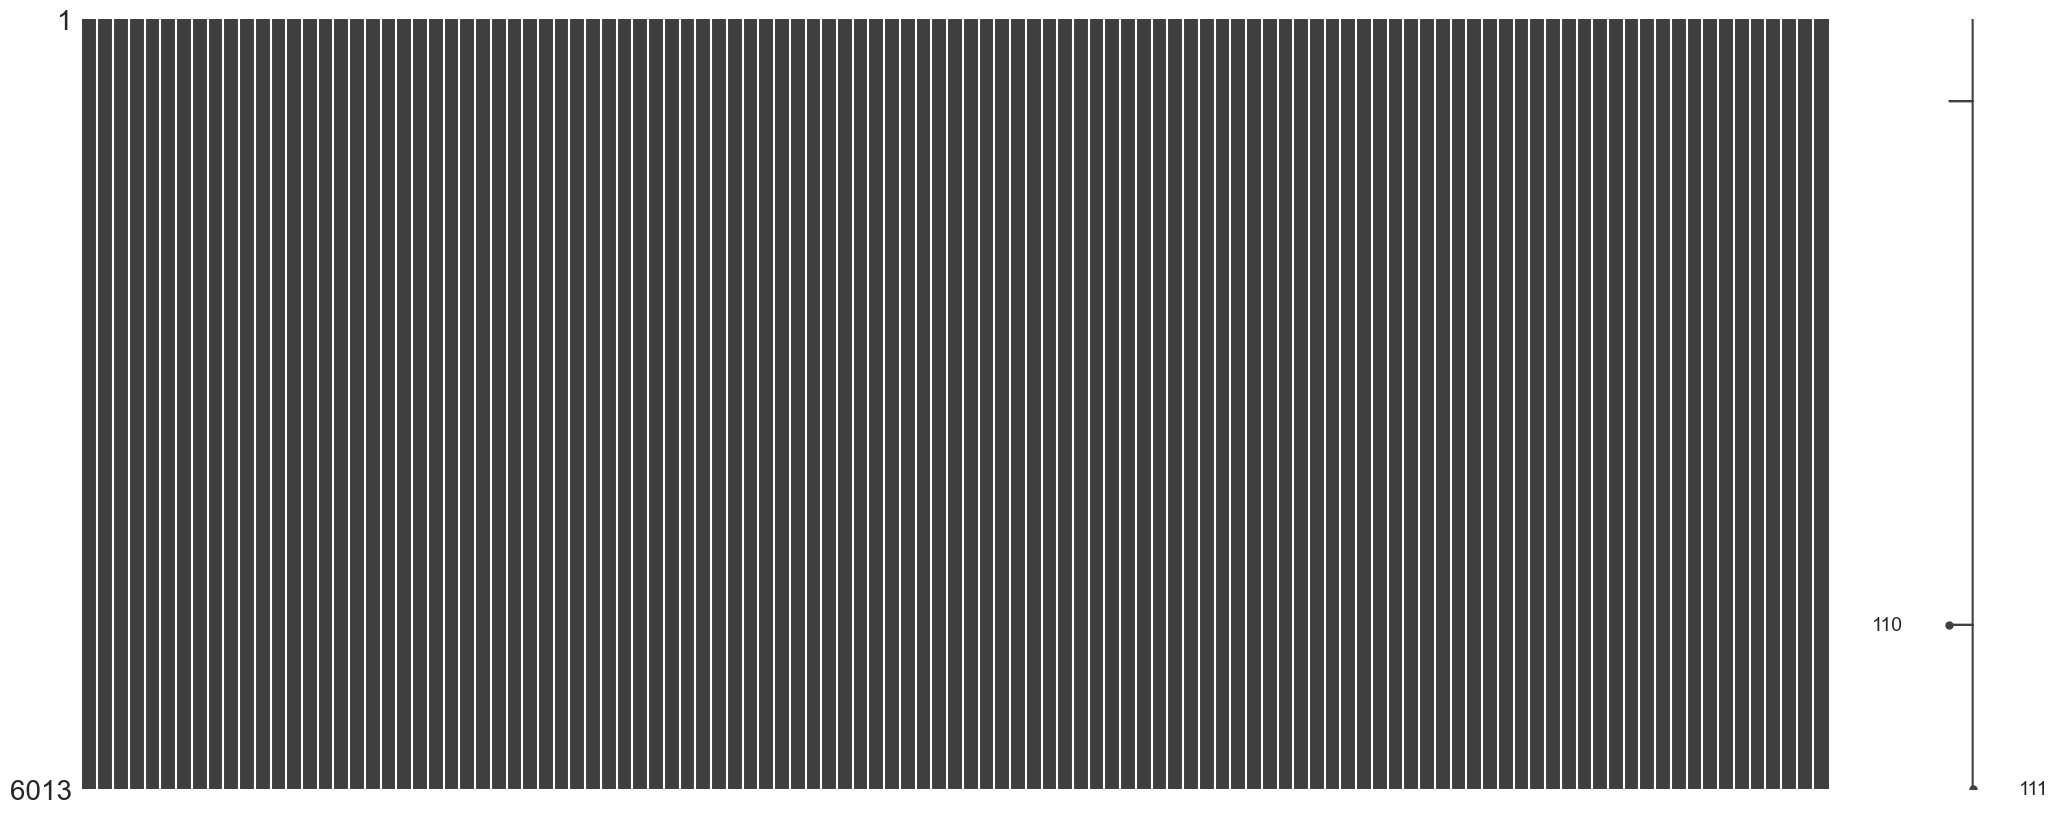

In [5]:
# Observaremos datos faltantes o nulos en la base de datos de validación (2010)
msgo.matrix(df_2010)

Observamos que la base de datos del año 2009 no tienen valores faltantes ni nulos, por lo que podemos continuar con el procesamiento de los datos. Para la base de datos 2010, se registra un valor faltante, por lo que optaremos a dropearlo ya que no afectará en la dimensión de datos.

In [6]:
df_2009 = df_2009.dropna()
df_2010 = df_2010.dropna()

## Variables objetivo: arstmade
Primero visualizaremos en gráficos la información de cada columna, para determinar qué haremos con estas antes de llevarlas a los modelos.  

La variable objetivo 'arstmade' es una variable binaria que eventualmente recodificaremos para mejor rendimiento de los modelos de predicción. 


Text(0.5, 1.0, 'Distribución de variable "arstmade"')

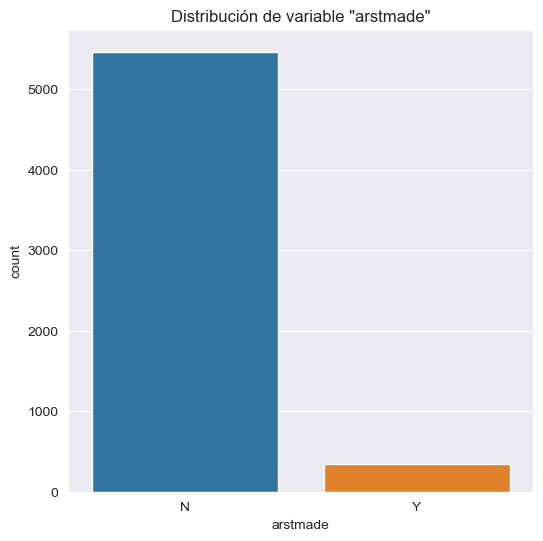

In [7]:
# Observamos la variable objetivo de arresto
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(data=df_2009, x='arstmade')
plt.title('Distribución de variable "arstmade"')

In [8]:
# Revisamos proporción
df_2009['arstmade'].value_counts(normalize=True)

N    0.940124
Y    0.059876
Name: arstmade, dtype: float64

Se puede ser una variable altamente desbalanceada, lo que producirá fallas al momento de predecir su suceso ya que es probable que los modelos puedan identificar cómodamente cuando NO se realizará un arresto pero fallarán al momento de determinar si el arresto SI sucederá ya que le faltará información al modelo. Tendremos que utilizar algún método de oversampling para balancear la muestra.

## Variable objetivo: violence

Por otro lado, la variable de que determinará si existió violencia durante el arresto tendrá que ser creada considerando los datos de las columnas con el prefijo 'pf_*'.

In [9]:
# Creamos una lista con las variables a utilizar
violence = []

# Llenamos esa lista
for column in df_2009.columns:
    if 'pf_' in column:
        violence.append(column)

# Revisamos la lista
violence

['pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other']

Text(0.5, 1.0, 'Distribución de variable "violence"')

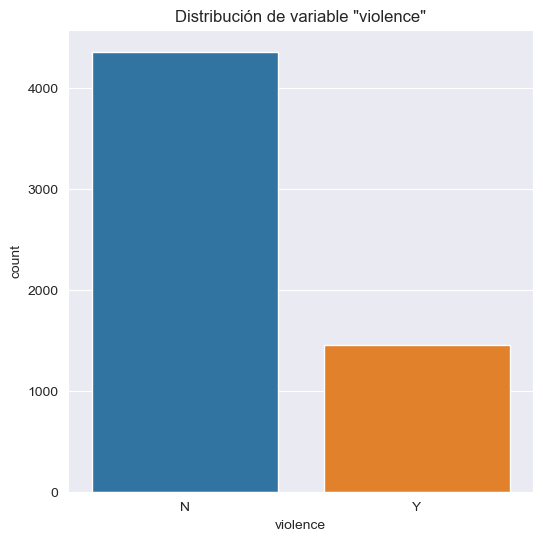

In [10]:
# Creamos nuestra variable objetivo en un DataFrame donde sumaremos los valores de todas las columnas para
# convertirlas en una sola y agregarla a nuestro DataFrame 2009
df_2009['violence'] = pd.DataFrame(df_2009[violence].replace(['Y','N'],[1,0])).sum(axis=1)
df_2010['violence'] = pd.DataFrame(df_2010[violence].replace(['Y','N'],[1,0])).sum(axis=1)

# Reemplaremos el valor superior a 0 por Y y N para que nuestro segundo target también sea binario.
df_2009['violence'] = pd.DataFrame(np.where(df_2009['violence']>0,'Y','N'))
df_2010['violence'] = pd.DataFrame(np.where(df_2010['violence']>0,'Y','N'))

# Observamos la variable objetivo de arresto
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(data=df_2009, x='violence')
plt.title('Distribución de variable "violence"')

In [11]:
# Revisamos proporción
df_2009['violence'].value_counts(normalize=True)

N    0.75
Y    0.25
Name: violence, dtype: float64

Observamos que al igual que la variable 'arstmade', 'violence' se encuentra desbalanceada y tendremos que trabajar algunos métodos de oversampling o subsampling para equilibrarla.

### Recodificación de variables objetivos

Se recodificarán las variables con valores 1 y 0 para trabajar con valores binarios.

In [12]:
df_2009['arstmade'] = df_2009['arstmade'].replace(['Y','N'],[1,0])
df_2009['violence'] = df_2009['violence'].replace(['Y','N'],[1,0])

df_2010['arstmade'] = df_2010['arstmade'].replace(['Y','N'],[1,0])
df_2010['violence'] = df_2010['violence'].replace(['Y','N'],[1,0])

## Hito 2

### Atributos en relación a variable objetivo

Observaremos gráficamente la relación de las variables y la variable objetivo. Primero observaremos la relación que existe por ciudad.

In [13]:
# Función para generar gráficos con los porcetajes de los valores.
def graficos_porcentajes(data, colname, target):
    # Crear un gráfico de barras apilado
    ax = sns.histplot(data=data, x=colname, hue='arstmade', multiple='stack')

    # Calcular porcentajes
    counts = data.groupby([colname, target]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Agregar anotaciones de texto para porcentajes en cada barra
    for i, (p, q) in enumerate(zip(percentages[0], percentages[1])):
        if p > 0:
            ax.text(i - 0.2, counts[0][i] + counts[1][i], f"{p:.1f}%", color='black', fontsize=9)
        if q > 0:
            ax.text(i - 0.2, counts[1][i], f"{q:.1f}%", color='black', fontsize=9)

    ax.set_title(colname)
    return ax

### Target y Circunstancias adicionales

Revisaremos las variables de 'ac_*', circunstancias adicionales para la detención y revisaremos cuántas de estas si terminaron en arrestos para determinar si podemos obtener más información al respecto.

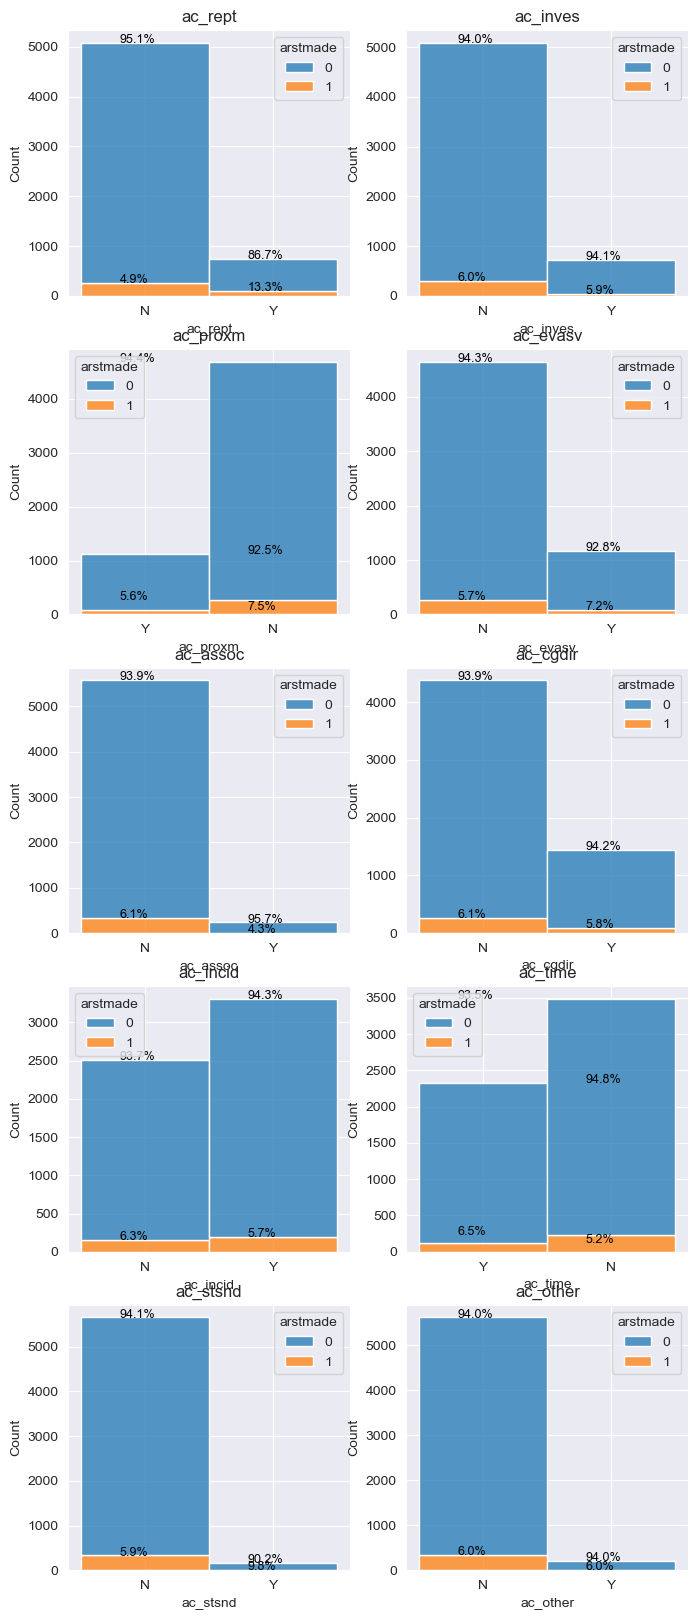

In [14]:
contador = 0
plt.figure(figsize=(8,20))
for colname in df_2009.columns:
    if "ac_" in colname:
        contador += 1
        plt.subplot(5,2,contador)
        graficos_porcentajes(df_2009, colname, 'arstmade')
        

Observamos que la mayoría de estas variables tiene un porcentaje similar de arresto, cerca del 6%, salvo en el caso de la variable 'ac_rept' que correspondería a si la persona detenida fue reportada como un testigo, víctima y por un oficial. Revisaremos más columnas para determinar si son buenos elementos para el modelo.

### Target y Razones de detención.

Visualizaremos la información de las columnas 'cs_*', razones de detención.

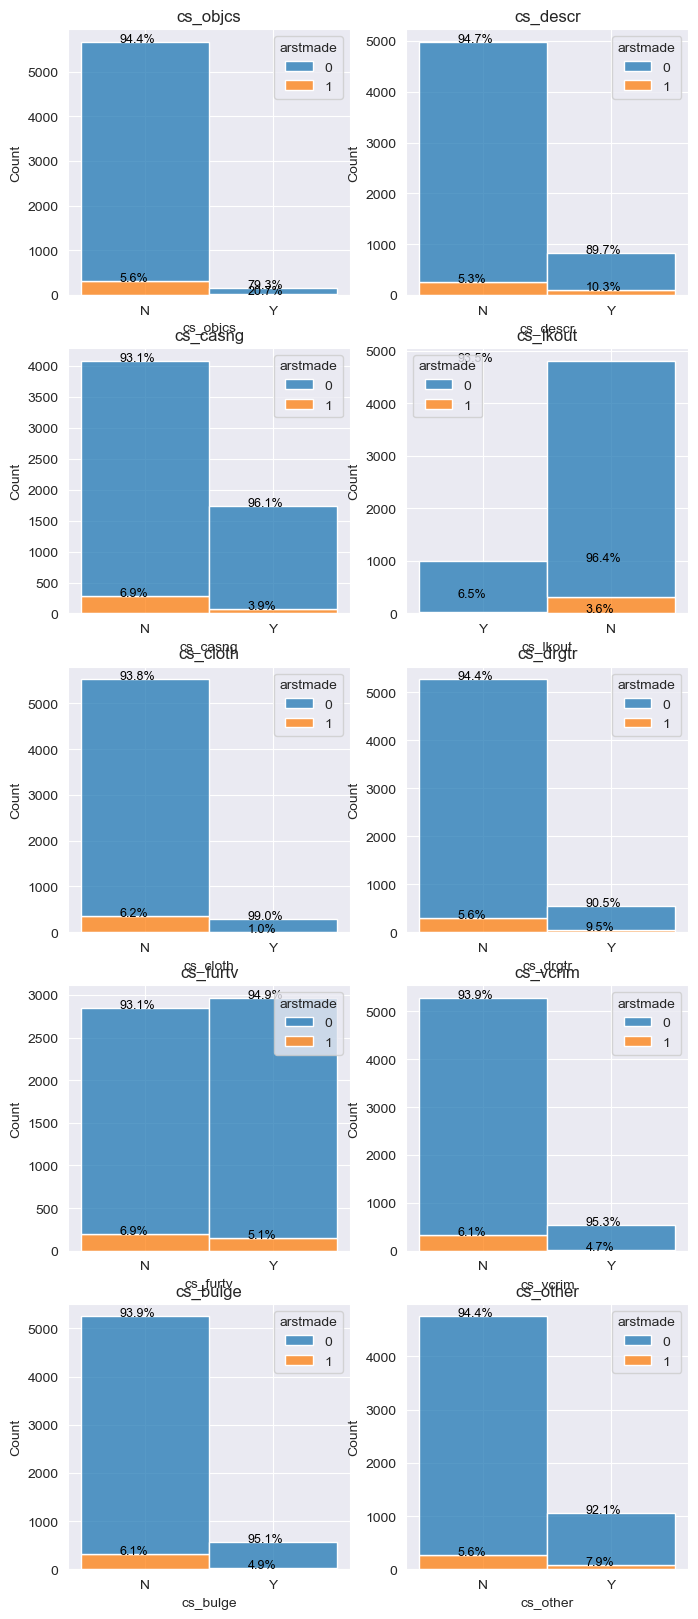

In [15]:
contador = 0
plt.figure(figsize=(8,20))
for colname in df_2009.columns:
    if "cs_" in colname:
        contador += 1
        plt.subplot(5,2,contador)
        graficos_porcentajes(df_2009, colname, 'arstmade')

De los gráficos observados se nota una diferencia de porcetajes en aquellas variables que se refieren a sospecha por cargar objeto sospechoso ('cs_objcs') y en la detención por encajar en la descripción de un sospechoso ('cs_descr'). Vemos que esas columnas podrían determinar con mayor claridad el arresto de una persona.

### Target y Razones de revisión.

Visualizaremos la información de las columnas 'rf_*', razones de revisión.

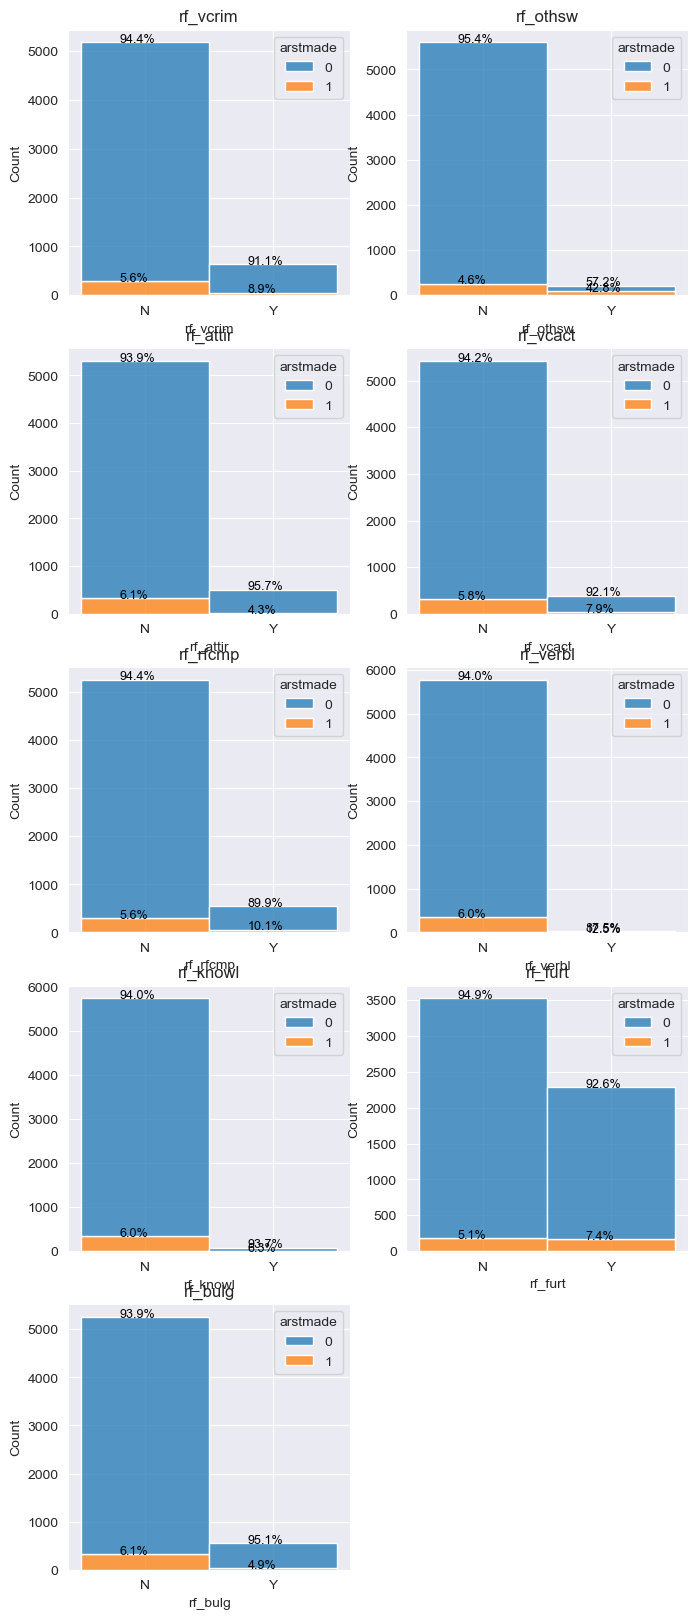

In [16]:
contador = 0
plt.figure(figsize=(8,20))
for colname in df_2009.columns:
    if "rf_" in colname:
        contador += 1
        plt.subplot(5,2,contador)
        graficos_porcentajes(df_2009, colname, 'arstmade')

Donde observamos variables con mayor diferencia de porcentajes que pudieran ser significativas al momento de determinar un arresto son la sospecha de cargar un arma ('rf_othsw') y en la variable que indica que el sujeto se rehuso a seguir las ordenes de la policía ('rf_rfcmp').

### Target y Uso de la fuerza física.

Visualizaremos la información de las columnas 'pf_*', uso de la fuerza física en la detención. Estas son las variables que determinamos como violencia (target), las veremos a detalle para conocer y manejar mejor información sobre nuestra base de datos.

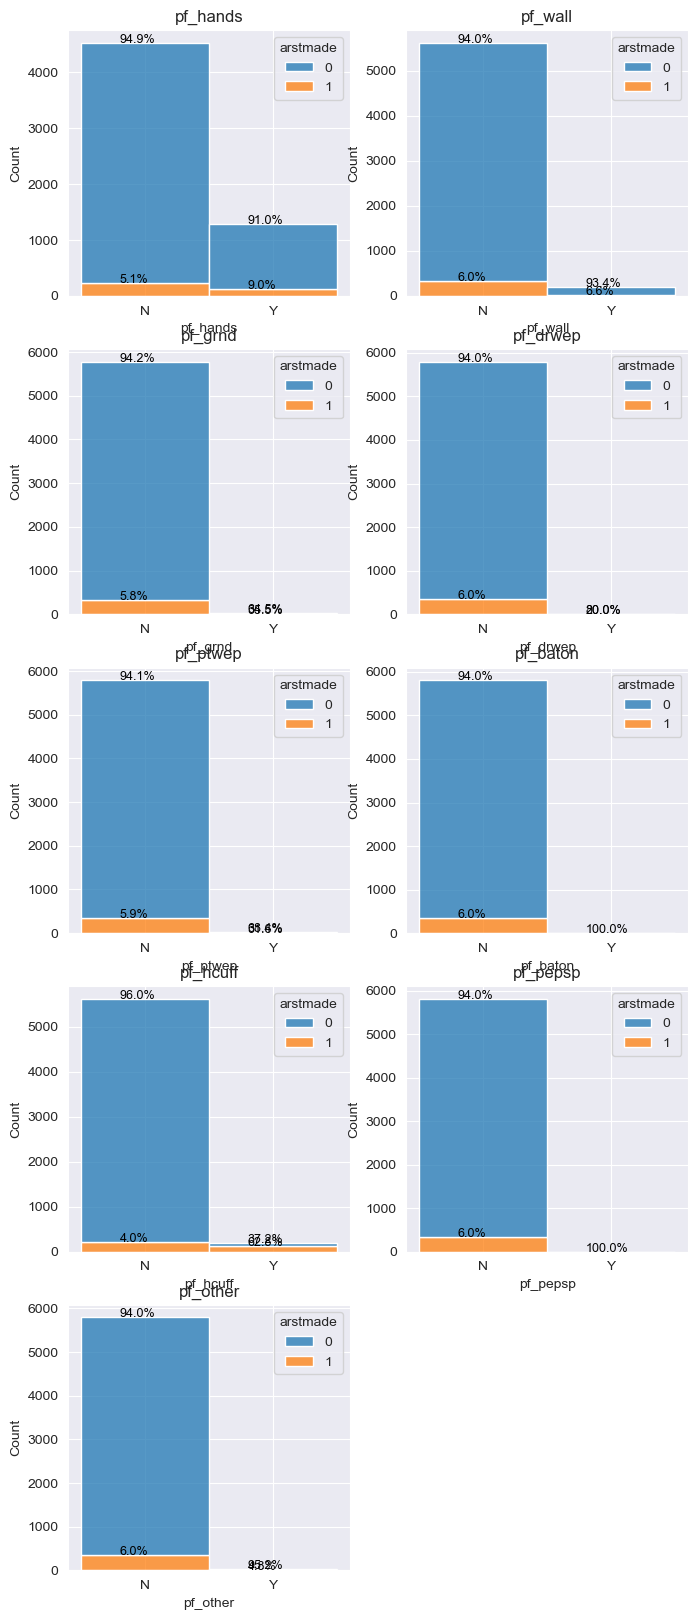

In [17]:
contador = 0
plt.figure(figsize=(8,20))
for colname in df_2009.columns:
    if "pf_" in colname:
        contador += 1
        plt.subplot(5,2,contador)
        graficos_porcentajes(df_2009, colname, 'arstmade')

Se observa en el gráfico que al menos en el 60% de las detenciones se utilizan esposas. Además se observa que a pesar de que hayamos simplificado estos hechos en una sola columna, el porcentaje de ocurrencia de cada uno de ellos es bajo en comparación a las detenciones y arrestos realizados.

### Target y columnas de descripción del sujeto

Se decidió optar por aquellas columnas que no tengan que ver con la descripción física del sujero sino que se relacionen a su actuar, por lo tanto, se revisarán las columnas que tienen información sobre lo que el sujeto andaba cargando en el momento de la detención.

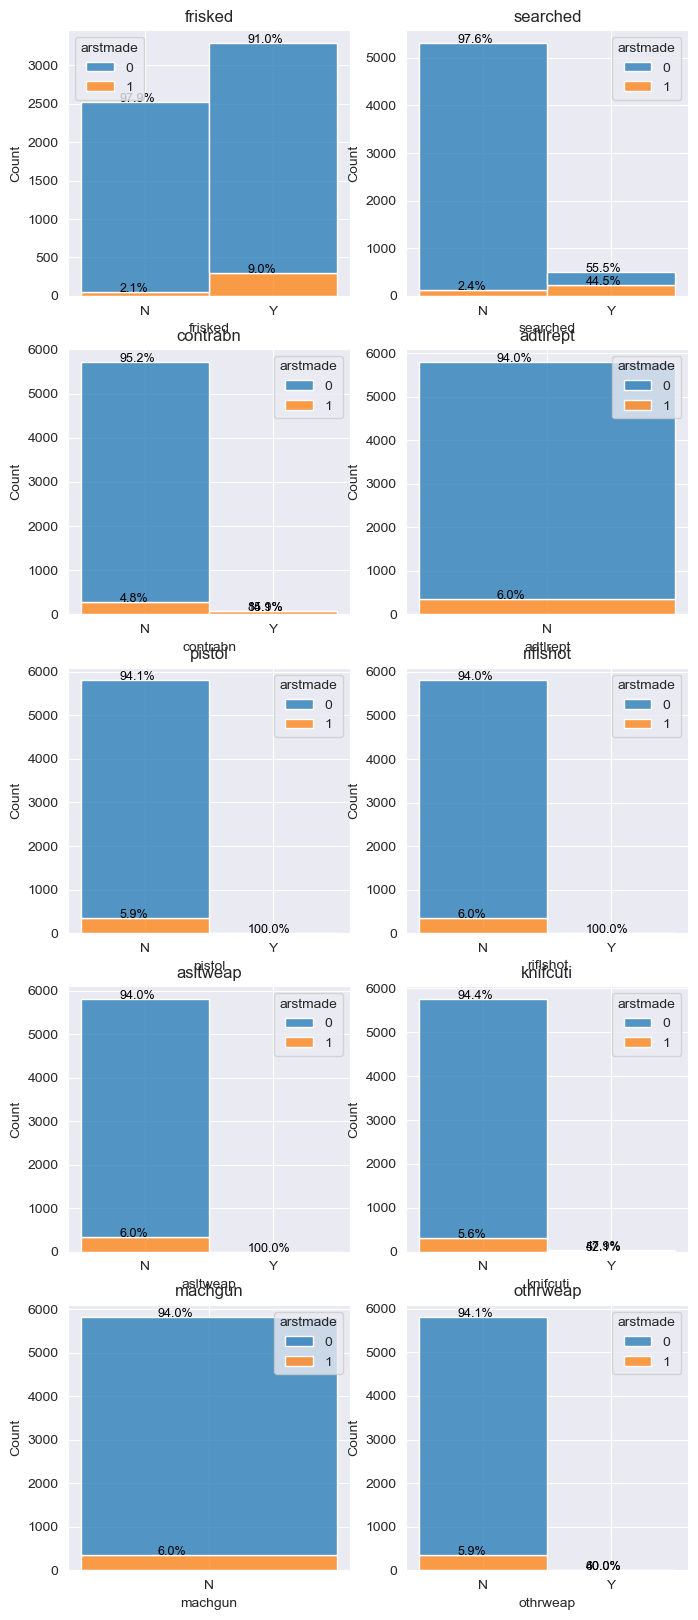

In [18]:
variables = ['frisked','searched','contrabn','adtlrept','pistol','riflshot','asltweap','knifcuti','machgun','othrweap']
plt.figure(figsize=(8,20))

for index, colname in enumerate(variables):
    plt.subplot(5,2,index+1)
    graficos_porcentajes(df_2009, colname, 'arstmade')

De las variables observadas recientemente vamos a considerar las que den mayores luces de información para nuestro modelo. Se considerará la variable 'searched', 'knifcuti', 'othrweap' y 'contrabn' ya que son columnas que muestran una relación clara con la detención en porcentajes muy altos.

### Variables a considerar en los próximos modelos

Con la observación hecha de algunas variables, se ha optado por dejar fuera a todas aquellas variables que incluyan una descripción física del sujeto detenido, no se considerará tampoco su sexo o edad para evitar sesgos de información. Por otro lado, aquellas variables que indican el lugar de detención, calle, ciudad o fecha, tampoco serán consideradas en el futuro modelo para considerar solo aquello que tenga extricta relación con el acto delictivo.   

Para el modelo se consideraran:
* Razones de revisión ('rf_*')
* Razones de detención ('cs_objcs', 'cs_descr')
* Circunstancias adicionales ('ac_rept')
* Descripción de objetos del sujeto ('searched','knifcuti','othrweap','contrabn')

Todas las variables serán recodificadas en valores binarios.

In [110]:
variables = ['arstmade', 'violence', 'cs_objcs', 'cs_descr', 'ac_rept','searched','knifcuti','othrweap','contrabn']

for colname in df_2009.columns:
    if 'rf_' in colname:
        variables.append(colname)

# Crearemos un nuevo DataFrame
df_model = df_2009[variables].copy()
df_test = df_2010[variables].copy()

### Recodificación de variables

Las variables serán transformadas a varibles binarias.

In [144]:
for colname in df_model.columns:
    if colname != ['arstmade', 'violence']:
        df_model[colname] = df_model[colname].replace(['Y','N'],[1,0])
        df_test[colname] = df_test[colname].replace(['Y','N'],[1,0])

In [21]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   arstmade  5812 non-null   int64
 1   violence  5812 non-null   int64
 2   cs_objcs  5812 non-null   int64
 3   cs_descr  5812 non-null   int64
 4   ac_rept   5812 non-null   int64
 5   searched  5812 non-null   int64
 6   knifcuti  5812 non-null   int64
 7   othrweap  5812 non-null   int64
 8   contrabn  5812 non-null   int64
 9   rf_vcrim  5812 non-null   int64
 10  rf_othsw  5812 non-null   int64
 11  rf_attir  5812 non-null   int64
 12  rf_vcact  5812 non-null   int64
 13  rf_rfcmp  5812 non-null   int64
 14  rf_verbl  5812 non-null   int64
 15  rf_knowl  5812 non-null   int64
 16  rf_furt   5812 non-null   int64
 17  rf_bulg   5812 non-null   int64
dtypes: int64(18)
memory usage: 817.4 KB


In [22]:
df_test = df_test.dropna()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6009 entries, 0 to 6010
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   arstmade  6009 non-null   int64  
 1   violence  6009 non-null   float64
 2   cs_objcs  6009 non-null   int64  
 3   cs_descr  6009 non-null   int64  
 4   ac_rept   6009 non-null   int64  
 5   searched  6009 non-null   int64  
 6   knifcuti  6009 non-null   int64  
 7   othrweap  6009 non-null   int64  
 8   contrabn  6009 non-null   int64  
 9   rf_vcrim  6009 non-null   int64  
 10  rf_othsw  6009 non-null   int64  
 11  rf_attir  6009 non-null   int64  
 12  rf_vcact  6009 non-null   int64  
 13  rf_rfcmp  6009 non-null   int64  
 14  rf_verbl  6009 non-null   int64  
 15  rf_knowl  6009 non-null   int64  
 16  rf_furt   6009 non-null   int64  
 17  rf_bulg   6009 non-null   int64  
dtypes: float64(1), int64(17)
memory usage: 892.0 KB


Ahora ya estamos en condiciones de ir a modelar nuestros datos.

Como sabemos que nuestra data se encuentra desbalanceada en ambos objetivos, vamos a balancear utilizando Oversampling

### Balance de la muestra: Oversampling

In [86]:
oversample = RandomOverSampler(sampling_strategy='minority')
# Aplicamos el fit a la muestra
X_over, y_over = oversample.fit_resample(df_model.iloc[:,1:], df_model['arstmade'])

### Muestras de entrenamiento y validación

In [87]:
# Separaremos la muestra para modelar la predicción del target 'arstmade'
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=89, test_size=.3)

## Hito 3

Generaremos 3 modelos predictivos para el target 'arstmade'.

## TARGET 'ARSTMADE'

### Modelos predictivos (sin hiperparámetros)

In [88]:
# Modelo Logístico
arst_logit = LogisticRegression(random_state=89).fit(X_train, y_train)
# Modelo DecisionTree
arst_tree = DecisionTreeClassifier(random_state=89).fit(X_train, y_train)
# Modelo RandomForest
arst_forest = RandomForestClassifier(random_state=89).fit(X_train, y_train)

### Predicciones

In [89]:
# Predicciones de cada modelo
logit_hat = arst_logit.predict(X_test)
tree_hat = arst_tree.predict(X_test)
forest_hat = arst_forest.predict(X_test)

### Métricas modelos (sin hiperparámetros)

In [90]:
# Métrica Modelo Logístico
print(classification_report(y_test, logit_hat)) 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1634
           1       0.91      0.76      0.83      1645

    accuracy                           0.84      3279
   macro avg       0.85      0.84      0.84      3279
weighted avg       0.85      0.84      0.84      3279



In [91]:
# Métrica Modelo DecisionTree
print(classification_report(y_test, tree_hat))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1634
           1       0.91      0.85      0.88      1645

    accuracy                           0.88      3279
   macro avg       0.88      0.88      0.88      3279
weighted avg       0.88      0.88      0.88      3279



In [92]:
# Métrica Modelo RadomForest
print(classification_report(y_test, forest_hat))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1634
           1       0.91      0.85      0.88      1645

    accuracy                           0.88      3279
   macro avg       0.88      0.88      0.88      3279
weighted avg       0.88      0.88      0.88      3279



En primera instancia y sin balancear los hiperparámetros vemos que los modelos nos dan resultados similares.
Todos los modelos tenían una muy baja precision al momento de predecir un arresto (valor 1) cerca del 40%, no así al predecir el valor 0, esto puede deberse a lo desbalanceado de la muestra, a pesar de que usamos oversampling en la muestra de entrenamiento. El modelo RandomForest es el que muestra un acurracy 1% superior a los otros y se ve un poco más balanceado entre sus precisiones, aún así su resultado ronda lo azaroso.   

**Quisiera agregar que en este punto los modelos me habían dado muy baja precision y yo había hecho oversampling solo en las muestras de entrenamiento, para probar un cambio decidí hacer el oversampling en la muestra completa**  

Después de corregir el oversampling, los modelos mejoraron su rendimiento, teniendo un accuracy más bajo que el anterior pero mucho más estable en cuanto a la predicción de ambos valores.

### Modelos (Búsqueda de grilla)

Buscaremos mejores hiperparámetros para nuestros modelos con la finalidad de mejorar sus métricas de rendimiento.

In [159]:
# Modelo logístico con Hiperparámetos 
arst_logit_hp = LogisticRegression(random_state=89)

# Definimos los hiperparámetros
hiper_params = {
    'penalty': ['l1','l2','elasticnet', None],
    'C': [0.01, 1, 10, 100],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_logit = GridSearchCV(arst_logit_hp, param_grid = hiper_params)

# Realizamos el fit
arst_grilla_logit.fit(X_train, y_train)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {arst_grilla_logit.best_estimator_}')
print(f'Mejor puntaje: {arst_grilla_logit.best_score_}')

Mejores hiperparámetros: LogisticRegression(C=0.01, class_weight='balanced', penalty=None,
                   random_state=89)
Mejor puntaje: 0.8376244031512758


In [160]:
# Modelo DecisionTree con Hiperparámetos 
arst_dt_hp = DecisionTreeClassifier(random_state=89)

# Definimos los hiperparámetros
hiper_params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_features': [None,'log2','sqrt'],
    'max_depth': range(1, 20, 4),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_dt = GridSearchCV(arst_dt_hp, param_grid = hiper_params)

# Realizamos el fit
arst_grilla_dt.fit(X_train, y_train)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {arst_grilla_dt.best_estimator_}')
print(f'Mejor puntaje: {arst_grilla_dt.best_score_}')

Mejores hiperparámetros: DecisionTreeClassifier(class_weight='balanced', max_depth=17,
                       max_features='log2', random_state=42)
Mejor puntaje: 0.8839050684586021


In [161]:
# Modelo RandomForest con Hiperparámetos 
arst_rf_hp = RandomForestClassifier(random_state=89)

# Definimos los hiperparámetros
hiper_params = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(10, 100, 10),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_rf = GridSearchCV(arst_rf_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
arst_grilla_rf.fit(X_train, y_train)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {arst_grilla_rf.best_estimator_}')
print(f'Mejor puntaje: {arst_grilla_rf.best_score_}')

Mejores hiperparámetros: RandomForestClassifier(max_features='log2', n_estimators=30, random_state=42)
Mejor puntaje: 0.8816832458227364


### Predicciones

In [162]:
logit_hatgrilla = arst_grilla_logit.predict(X_test)
tree_hatgrilla = arst_grilla_dt.predict(X_test)
forest_hatgrilla = arst_grilla_rf.predict(X_test)

### Métricas modelos (con grilla)

In [163]:
# Métrica Modelo Logístico
print(classification_report(y_test, logit_hatgrilla)) 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1634
           1       0.91      0.76      0.83      1645

    accuracy                           0.84      3279
   macro avg       0.85      0.84      0.84      3279
weighted avg       0.85      0.84      0.84      3279



In [164]:
# Métrica Modelo DecisionTree
print(classification_report(y_test, tree_hatgrilla))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1634
           1       0.91      0.85      0.88      1645

    accuracy                           0.88      3279
   macro avg       0.88      0.88      0.88      3279
weighted avg       0.88      0.88      0.88      3279



In [165]:
# Métrica Modelo RandomForest
print(classification_report(y_test, forest_hatgrilla))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1634
           1       0.91      0.85      0.88      1645

    accuracy                           0.88      3279
   macro avg       0.89      0.88      0.88      3279
weighted avg       0.89      0.88      0.88      3279



### Observaciones

Después de revisar los resultados de los modelos propuestos, notamos que al agregar los hiperparámetros con la grilla los modelos mejoran su accuracy en un 1%. Si tuvieramos que elegir un modelo nos quedariamos con RandomForest ya que, al igual que DecisionTree nos da más de un 90% de precision al predecir si se producirá un arresto.

### Features_importance

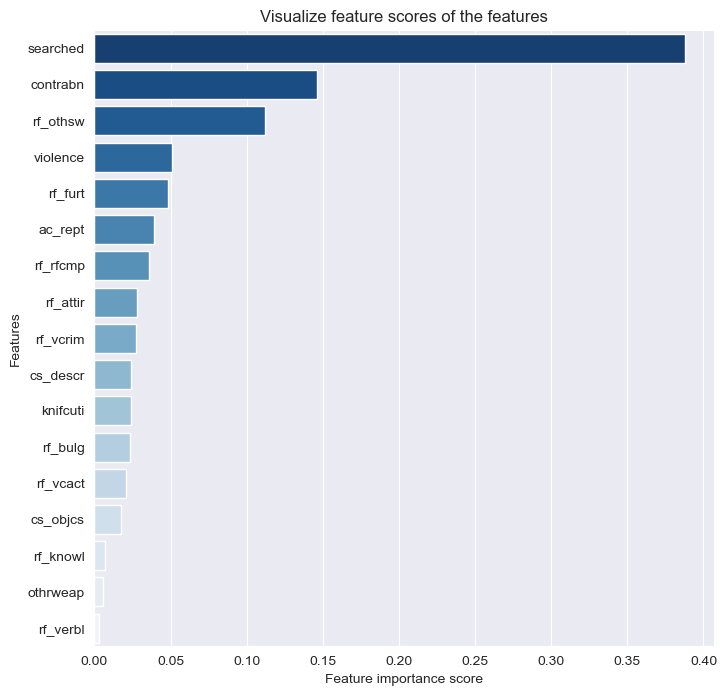

In [195]:
# Obtenemos los score de cada variable
feature_scores_vln = pd.Series(arst_grilla_rf.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Realizamos el gráfico de Features Importance
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(x=feature_scores_vln, y=feature_scores_vln.index, data=X_trainv, palette = 'Blues_r')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_vln.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Observamos en el gráfico que las variables que más influyen en el puntaje del modelo es 'searched' que hace referencia a si el sujeto era buscado por la policía, eso va a determinar con mucho peso si efectivamente la detención terminará en arresto.   
Además podemos observar influencia de las variables 'contrabn' que indica que el sospechoso andaba en acciones de contrabando y 'rf_othsw' que indica que el sospechoso pudiese portar otro tipo de armas.

## TARGET 'VIOLENCE'

In [146]:
df_violence = df_model.copy()
df_violence.pop('violence')
df_violence

,arstmade,cs_objcs,cs_descr,ac_rept,searched,knifcuti,othrweap,contrabn,rf_vcrim,rf_othsw,rf_attir,rf_vcact,rf_rfcmp,rf_verbl,rf_knowl,rf_furt,rf_bulg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5808,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1
5809,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5810,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [147]:
# Haremos un nuevo oversampling para esta muestra
oversample_v = RandomOverSampler(sampling_strategy='minority')
# Aplicamos el fit a la muestra
X_overv, y_overv = oversample_v.fit_resample(df_violence, df_model['violence'])
# Separaremos la muestra para modelar la predicción del target 'violence'
X_trainv, X_testv, y_trainv, y_testv = train_test_split(X_overv, y_overv, random_state=89, test_size=.3)

### Modelos (con hiperparámetros)

In [167]:
# Modelo logístico con Hiperparámetros 
vln_logit_hp = LogisticRegression(random_state=89)

# Definimos los hiperparámetros
hiper_params = {
    'penalty': ['l1','l2','elasticnet', None],
    'C': [0.01, 1, 10, 100],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_logit = GridSearchCV(vln_logit_hp, param_grid = hiper_params)

# Realizamos el fit
vln_grilla_logit.fit(X_trainv, y_trainv)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_logit.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_logit.best_score_}')

Mejores hiperparámetros: LogisticRegression(C=1, random_state=89)
Mejor puntaje: 0.7169726507431425


In [168]:
# Modelo RandomForest con Hiperparámetros
vln_rf_hp = RandomForestClassifier(random_state=89)

# Definimos los hiperparámetros
hiper_params = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(10, 100, 10),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_rf = GridSearchCV(vln_rf_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_rf.fit(X_trainv, y_trainv)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_rf.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_rf.best_score_}')

Mejores hiperparámetros: RandomForestClassifier(max_features='log2', n_estimators=40, random_state=89)
Mejor puntaje: 0.7395935758767618


In [169]:
# Modelo SVC con Hiperparámetros
vln_svc_hp = SVC(random_state=89)

# Definimos los hiperparámetros
hiper_params = {
    'C': [0.001, 0.1, 1, 100],
    'gamma': [0.0001, 0.01, 1, 10],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_svc = GridSearchCV(vln_svc_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_svc.fit(X_trainv, y_trainv)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_svc.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_svc.best_score_}')

Mejores hiperparámetros: SVC(C=0.1, class_weight='balanced', gamma=10, random_state=89)
Mejor puntaje: 0.7451655195018027


In [170]:
# Modelo GradientBoosting con Hiperparámetros
vln_gb_hp = GradientBoostingClassifier(random_state=89)

# Definimos los hiperparámetros
hiper_params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 200, 500],
    'subsample': [0.1, 0.5, 0.9]
}

# Definimos la grilla
vln_grilla_gb = GridSearchCV(vln_gb_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_gb.fit(X_trainv, y_trainv)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_gb.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_gb.best_score_}')

Mejores hiperparámetros: GradientBoostingClassifier(n_estimators=500, random_state=89, subsample=0.5)
Mejor puntaje: 0.7377908882333661


In [173]:
# Modelo Voting con Hiperparámetros 
estimators = [
    ('Logistic Grilla', vln_grilla_logit.best_estimator_),
    ('RandomForest Grilla', vln_grilla_rf.best_estimator_),
    ('SVC Grilla', vln_grilla_svc.best_estimator_),
    ('GradientBoosting Grilla ', vln_grilla_gb.best_estimator_)
]

voting_model = VotingClassifier(estimators).fit(X_trainv, y_trainv)

### Predicciones

In [175]:
logit_hatv = vln_grilla_logit.predict(X_testv)
forest_hatv = vln_grilla_rf.predict(X_testv)
svc_hatv = vln_grilla_svc.predict(X_testv)
gradient_hatv = vln_grilla_gb.predict(X_testv)
voting_hatv = voting_model.predict(X_testv)

### Métricas modelos

In [177]:
print(classification_report(y_testv, logit_hatv))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1345
           1       0.68      0.78      0.72      1271

    accuracy                           0.71      2616
   macro avg       0.72      0.71      0.71      2616
weighted avg       0.72      0.71      0.71      2616



In [178]:
print(classification_report(y_testv, forest_hatv))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      1345
           1       0.67      0.91      0.77      1271

    accuracy                           0.74      2616
   macro avg       0.77      0.74      0.73      2616
weighted avg       0.77      0.74      0.73      2616



In [179]:
print(classification_report(y_testv, svc_hatv))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67      1345
           1       0.66      0.94      0.77      1271

    accuracy                           0.73      2616
   macro avg       0.78      0.74      0.72      2616
weighted avg       0.79      0.73      0.72      2616



In [180]:
print(classification_report(y_testv, gradient_hatv))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69      1345
           1       0.67      0.92      0.77      1271

    accuracy                           0.74      2616
   macro avg       0.78      0.74      0.73      2616
weighted avg       0.78      0.74      0.73      2616



In [181]:
print(classification_report(y_testv, voting_hatv))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69      1345
           1       0.67      0.93      0.78      1271

    accuracy                           0.74      2616
   macro avg       0.78      0.75      0.73      2616
weighted avg       0.79      0.74      0.73      2616



Como se observan en las métricas de los modelos, todos tienden a tener mejor desempeño prediciendo cuando un arresto no tendrá actos de violencia, mostrando un porcentaje menor de aciertos al predecir si ese acto violento ocurrirá. La muestra estuvo nuevamente balanceada con oversampling pero es posible que no sea lo más adecuado en este caso, tendría que evaluarse la posibilidad de mejorar el resultado.
Nosotros escogeríamos el modelo RandomForest ya que presenta métricas un poco más estables entre sus valores.

## Feature_importances_

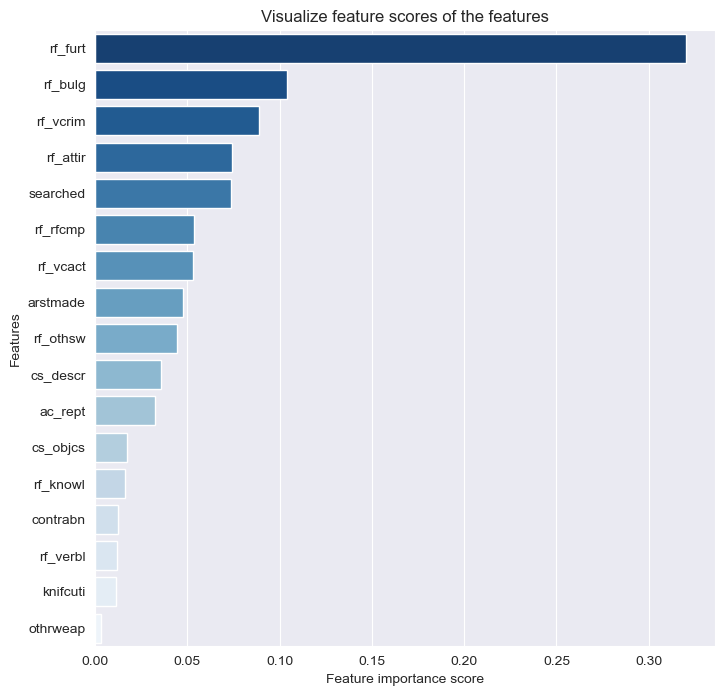

In [196]:
# Obtenemos los score de cada variable
feature_scores_vln = pd.Series(vln_grilla_rf.best_estimator_.feature_importances_, index=X_trainv.columns).sort_values(ascending=False)

# Realizamos el gráfico de Features Importance
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(x=feature_scores_vln, y=feature_scores_vln.index, data=X_train, palette = 'Blues_r')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_vln.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Con este gráfico podemos observar que la variable que más influye en si una detención tendrá un acto de violencia es la variable 'rf_furt' con mucha presencia. Esta variable indica que existieron movimientos furtivos que seguramente debieron ser inmovilizados de alguna manera que desencadenara violencia policial.  
Luego observamos las variables 'rf_vcrim', sospechoso de un acto violento y 'rf_bulg' presencia de un bulto misterioso.

## Serialización de los modelos elegidos

Para finalizar, serializaremos ambos modelos elegidos.

In [200]:
# RandomForest para predicción 'arstmade'
with open("ranciscaGalvez_DanielHerrera_P2_RFArst.pkl", "wb") as f:
    pickle.dump(arst_grilla_rf, f)

# RandomForest para predicción 'violence'
with open("ranciscaGalvez_DanielHerrera_P2_RFViolence.pkl", "wb") as f:
    pickle.dump(vln_grilla_rf, f)